In [1]:
import torch
# makes default tensor a CUDA tensor so GPU can be used
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device(2 if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

from lenet import LeNet
import torchvision
import torchvision.datasets as datasets
from interpretation_attacks import SimpleGradientsAttack
import matplotlib.pyplot as plt

In [2]:
net = LeNet()

epsilon = 0
alpha_wd = 0
alpha_jr = 0
training_round = 1

net.load_state_dict(torch.load(f'models/ep{epsilon}_wd{alpha_wd}_jr{alpha_jr}_1'))
net.eval()

data_preprocess = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(), 
                torchvision.transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
                datasets.MNIST(root='./data', train=True, transform=data_preprocess), 
                batch_size=1, shuffle=True)

		lenet(sample) = 9


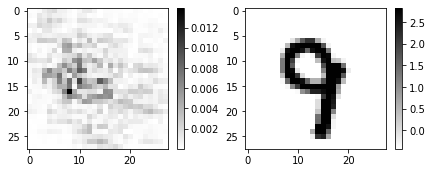

In [7]:
sample,label = next(iter(train_loader))
sample,label = sample.to(device),label.to(device)

sga = SimpleGradientsAttack(net, sample, label, device)
saliency_map = sga.saliency

mean = torch.mean(saliency_map)
std = torch.std(saliency_map)
# saliency_map = torch.where(saliency_map > mean+.75*std, saliency_map, torch.tensor(0.))

fig = plt.figure(figsize=(15,15))

print(f'\t\tlenet(sample) = {label.item()}')

fig.add_subplot(5,4,2)
plt.imshow(saliency_map.cpu().numpy(), cmap='binary')
plt.colorbar()

fig.add_subplot(5,4,3)
plt.imshow(sample.squeeze().cpu().numpy(), cmap='binary')
plt.colorbar()

plt.show()